# Communicate Data Findings Project
## Based on data from Bureau of Transportation Statisctic from April 2010 till March 2020

### Project made by Daria Krasnobaeva

This document explores a dataset containing monthly information about different Airlines and their attributes, such like flughts delays and cancellations, for the timeslot of 10 years.

In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [26]:
# load in the dataset into a pandas dataframe, print statistics
df= pd.read_csv('Project_data_airline_delay_causes.csv')

In [101]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(158150, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


In [27]:
print(df.head(10))

   year   month carrier            carrier_name airport  \
0  2010       4      9E  Pinnacle Airlines Inc.     ABE   
1  2010       4      9E  Pinnacle Airlines Inc.     AEX   
2  2010       4      9E  Pinnacle Airlines Inc.     ALB   
3  2010       4      9E  Pinnacle Airlines Inc.     ALO   
4  2010       4      9E  Pinnacle Airlines Inc.     ATL   
5  2010       4      9E  Pinnacle Airlines Inc.     ATW   
6  2010       4      9E  Pinnacle Airlines Inc.     AUS   
7  2010       4      9E  Pinnacle Airlines Inc.     AVL   
8  2010       4      9E  Pinnacle Airlines Inc.     AVP   
9  2010       4      9E  Pinnacle Airlines Inc.     AZO   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...        109.0        8.0   
1           Alexandria, LA: Alexandria International          8.0        0.0   
2                   Albany, NY: Albany International        110.0       13.0   
3                    Waterloo,

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158150 entries, 0 to 158149
Data columns (total 22 columns):
year                   158150 non-null int64
 month                 158150 non-null int64
carrier                158150 non-null object
carrier_name           158150 non-null object
airport                158150 non-null object
airport_name           158150 non-null object
arr_flights            157987 non-null float64
arr_del15              157953 non-null float64
carrier_ct             157987 non-null float64
 weather_ct            157987 non-null float64
nas_ct                 157987 non-null float64
security_ct            157987 non-null float64
late_aircraft_ct       157987 non-null float64
arr_cancelled          157987 non-null float64
arr_diverted           157987 non-null float64
 arr_delay             157987 non-null float64
 carrier_delay         157987 non-null float64
weather_delay          157987 non-null float64
nas_delay              157987 non-null float64
secu

In [29]:
print(df.describe())

                year          month    arr_flights      arr_del15  \
count  158150.000000  158150.000000  157987.000000  157953.000000   
mean     2014.939589       6.487708     397.778298      73.040537   
std         3.082633       3.459573    1051.773244     187.527048   
min      2010.000000       1.000000       1.000000       0.000000   
25%      2012.000000       3.000000      58.000000       9.000000   
50%      2015.000000       6.000000     119.000000      21.000000   
75%      2018.000000       9.000000     286.000000      55.000000   
max      2020.000000      12.000000   21977.000000    5268.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  157987.000000  157987.000000  157987.000000  157987.000000   
mean       20.922144       2.227658      22.693087       0.135372   
std        46.020827       6.865975      69.029527       0.576120   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.900000       0.0000

### What is the structure of your dataset?

We have information about 158.149 flights from different carries. For those carries wie have 21 points of information (the last column Unnamed:21 is empty and will not be included in futher anaylses)

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are information about cause of delay and cancelation of flights of different carries.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There is five cause of delay - Carrier, Weather, NAS, Security and Late Aircraft, as well as there are two cancelation information - cancelated or diverted flight. 

I wann analyse per Year which reason was the strongest and which carries had the most cancelation and diverted rate and see if I can find some patterns.

## Univariate Exploration

I'll start by looking at the distribution of the delays reasons and cancelation rate.

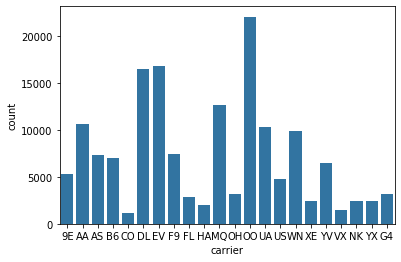

In [36]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='carrier', color = base_color);


In [40]:
gen_order = df.carrier_name.value_counts().index

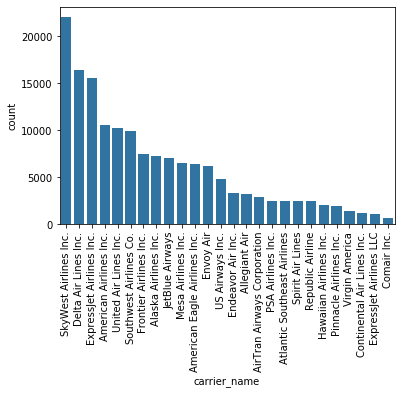

In [41]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='carrier_name', color = base_color, order = gen_order)
plt.xticks(rotation=90);

In [45]:
df_sub = df.loc[df['carrier_name'].isin(['United Air Lines Inc.','American Airlines Inc.','SkyWest Airlines Inc.','Delta Air Lines Inc.','ExpressJet Airlines Inc.'])]


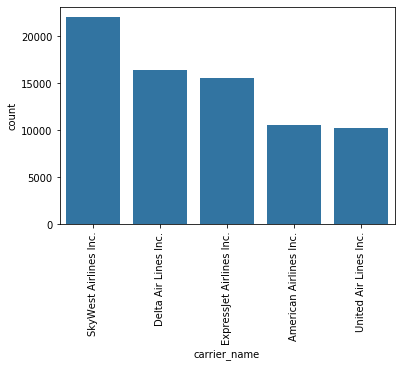

In [46]:
gen_order = df_sub.carrier_name.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df_sub, x='carrier_name', color = base_color, order = gen_order)
plt.xticks(rotation=90);

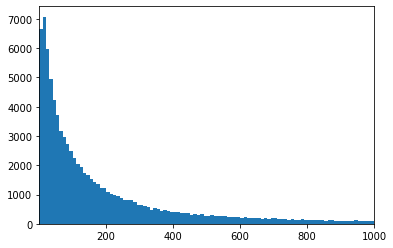

In [30]:
bin_edges=np.arange(1,df['weather_delay'].max()+10,10)
plt.hist(data = df, x = 'weather_delay', bins = bin_edges)
plt.xlim((1,1000));

#excluding 0 for the best picture of distribution

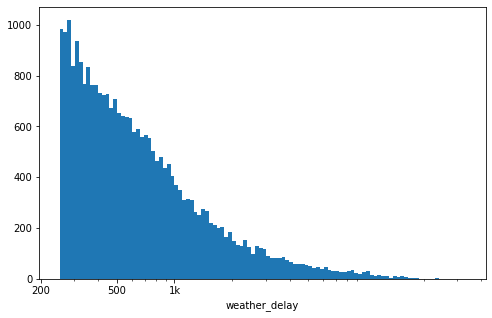

In [34]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(2.4, np.log10(df['weather_delay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'weather_delay', bins = bins)
plt.xscale('log')
plt.xticks([2e2, 5e2, 1e3], ['200', '500', '1k', '2k'])
plt.xlabel('weather_delay')
plt.show()

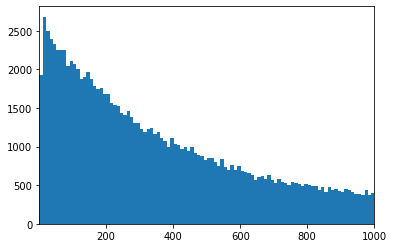

In [62]:
bins =np.arange(1,df[' carrier_delay'].max()+10,10)
plt.hist(data = df, x = ' carrier_delay', bins = bins);
plt.xlim((1,1000));

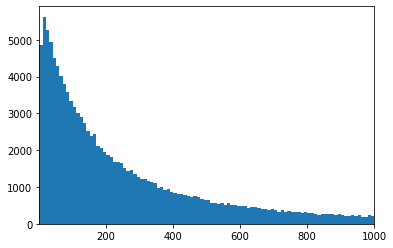

In [64]:
bins =np.arange(1,df['nas_delay'].max()+10,10)
plt.hist(data = df, x = 'nas_delay', bins = bins);
plt.xlim((1,1000));

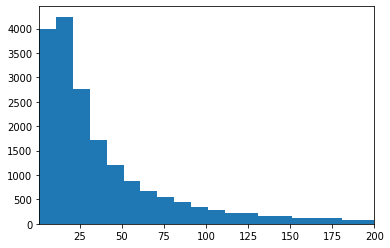

In [66]:
bins =np.arange(1,df['security_delay'].max()+10,10)
plt.hist(data = df, x = 'security_delay', bins = bins);
plt.xlim((1,200));

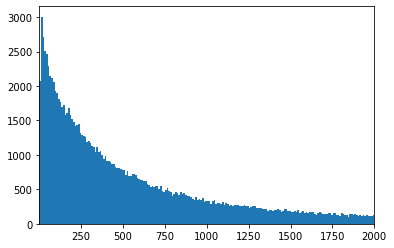

In [68]:
bins =np.arange(1,df['late_aircraft_delay'].max()+10,10)
plt.hist(data = df, x = 'late_aircraft_delay', bins = bins);
plt.xlim((1,2000));

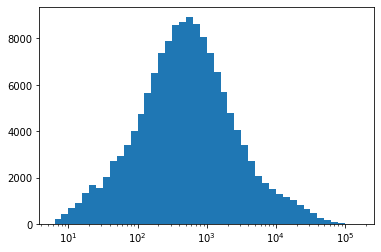

In [76]:
bin_edges = 10 ** np.arange(0.8, np.log10(df['late_aircraft_delay'].max())+0.1, 0.1)
plt.hist(df['late_aircraft_delay'], bins = bin_edges)
plt.xscale('log')
#tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
#plt.xticks(tick_locs, tick_locs);

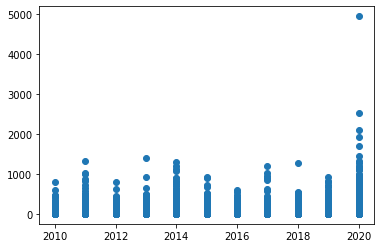

In [78]:
plt.scatter(data = df, x ='year', y='arr_cancelled');
#it's interesting to see the impact of corona virus on the data

In [ ]:
#sum cancelation and diff. delays by year
#than find the airline companies that had the most cancelation over the years
#and compere them

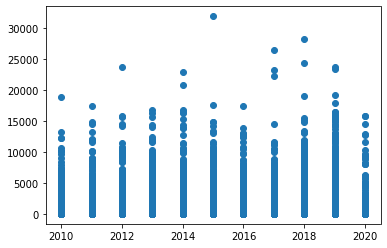

In [102]:
plt.scatter(data = df, x ='year', y='weather_delay');

In [4]:
#Creating a sub Dataframe with the entries, that had arriving delays
df_arrival_delay=df[df[' arr_delay']>0.0]
df_arrival_delay

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,4,9E,Pinnacle Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",109.0,8.0,5.53,0.00,...,2.00,0.0,1.0,437.0,390.0,0.0,10.0,0.0,37.0,NaN
2,2010,4,9E,Pinnacle Airlines Inc.,ALB,"Albany, NY: Albany International",110.0,13.0,9.00,1.00,...,0.00,1.0,0.0,376.0,311.0,17.0,48.0,0.0,0.0,NaN
3,2010,4,9E,Pinnacle Airlines Inc.,ALO,"Waterloo, IA: Waterloo Regional",23.0,3.0,2.00,0.00,...,0.78,0.0,0.0,123.0,105.0,0.0,4.0,0.0,14.0,NaN
4,2010,4,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1146.0,206.0,32.31,6.03,...,51.67,13.0,1.0,12939.0,2445.0,652.0,6053.0,0.0,3789.0,NaN
5,2010,4,9E,Pinnacle Airlines Inc.,ATW,"Appleton, WI: Appleton International",133.0,23.0,13.28,0.00,...,3.79,0.0,0.0,761.0,484.0,0.0,188.0,0.0,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158145,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0,NaN
158146,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0,NaN
158147,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0,NaN
158148,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0,NaN


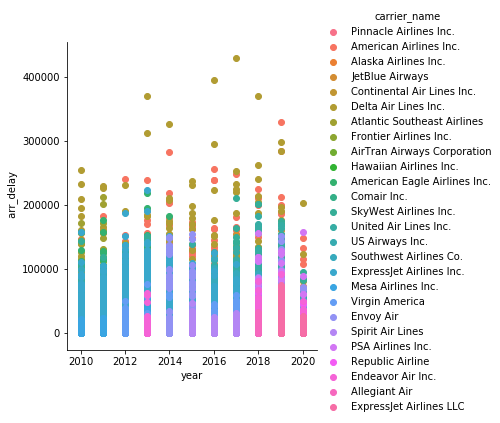

In [7]:
# plotting
g = sb.FacetGrid(data = df_arrival_delay, hue = 'carrier_name', height = 5)
g.map(plt.scatter, 'year', ' arr_delay')
#g.set(xscale = 'log') # need to set scaling before customizing ticks
#x_ticks = 'year'
#g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

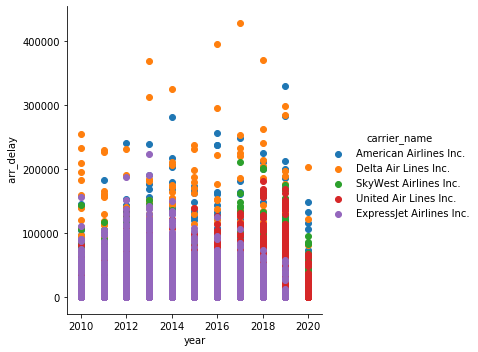

In [47]:
# plotting
g = sb.FacetGrid(data = df_sub, hue = 'carrier_name', height = 5)
g.map(plt.scatter, 'year', ' arr_delay')
#g.set(xscale = 'log') # need to set scaling before customizing ticks
#x_ticks = 'year'
#g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

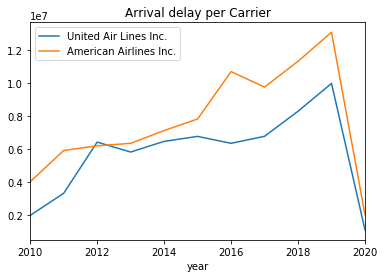

In [65]:
# One subplot again
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' arr_delay'].sum().reset_index(level=0)

# Use ax for both
sums[sums['carrier_name'] == 'United Air Lines Inc.'].plot(y=' arr_delay', ax=ax, label='United Air Lines Inc.')
sums[sums['carrier_name'] == 'American Airlines Inc.'].plot(y=' arr_delay', ax=ax, label='American Airlines Inc.')
ax.set_title("Arrival delay per Carrier");

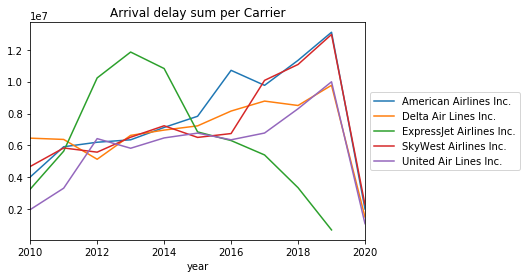

In [71]:
# making a loop
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' arr_delay'].sum().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y=' arr_delay', ax=ax, label=carrier)

ax.set_title("Arrival delay sum per Carrier")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

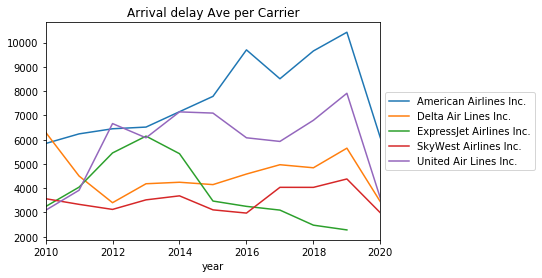

In [74]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' arr_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y=' arr_delay', ax=ax, label=carrier)

ax.set_title("Arrival delay Ave per Carrier")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [75]:
#carrier_delay

NameError: name 'carrier_delay' is not defined

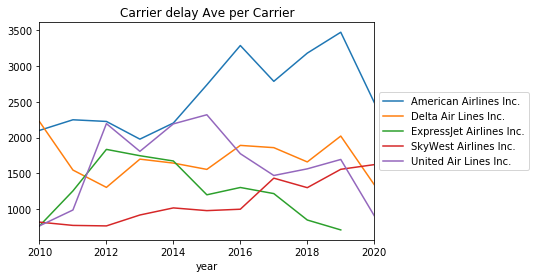

In [77]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])[' carrier_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y=' carrier_delay', ax=ax, label=carrier)

ax.set_title("Carrier delay Ave per Carrier")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [78]:
#weather_delay

NameError: name 'weather_delay' is not defined

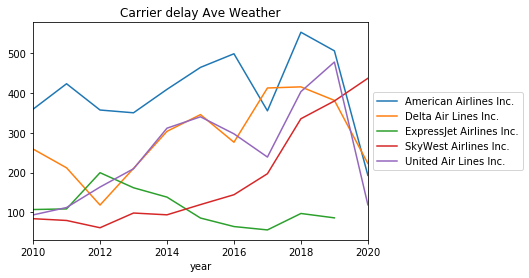

In [80]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['weather_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='weather_delay', ax=ax, label=carrier)

ax.set_title("Carrier delay Ave Weather")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

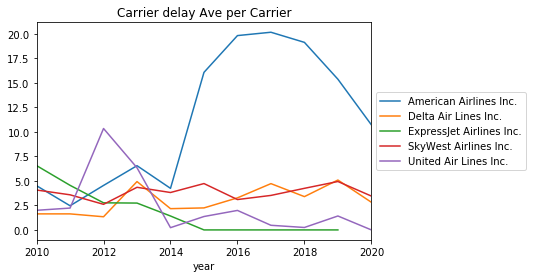

In [82]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['security_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='security_delay', ax=ax, label=carrier)

ax.set_title("Carrier delay Ave Security")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [85]:
df_sub.sort_values(by=['security_delay'], ascending=False)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
134557,2013,11,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2542.0,457.0,131.60,6.16,...,110.63,19.0,10.0,23974.0,8530.0,366.0,6982.0,1482.0,6614.0,NaN
35701,2019,6,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3577.0,1051.0,318.14,53.07,...,368.66,158.0,15.0,80055.0,28863.0,5114.0,12492.0,1287.0,32299.0,NaN
41611,2020,2,OO,SkyWest Airlines Inc.,SFO,"San Francisco, CA: San Francisco International",3480.0,569.0,222.47,41.51,...,19.79,41.0,15.0,58448.0,28483.0,4987.0,20960.0,1185.0,2833.0,NaN
73025,2017,11,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",11106.0,851.0,302.70,10.05,...,307.45,5.0,7.0,58922.0,26069.0,2287.0,6101.0,1153.0,23312.0,NaN
33435,2019,4,OO,SkyWest Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3572.0,342.0,88.34,8.04,...,118.54,20.0,2.0,25564.0,11357.0,1449.0,3795.0,1048.0,7915.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153150,2018,10,OO,SkyWest Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153223,2018,10,OO,SkyWest Airlines Inc.,EWN,"New Bern/Morehead/Beaufort, NC: Coastal Caroli...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153232,2018,10,OO,SkyWest Airlines Inc.,FSM,"Fort Smith, AR: Fort Smith Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153288,2018,10,OO,SkyWest Airlines Inc.,MFE,"Mission/McAllen/Edinburg, TX: McAllen Miller I...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


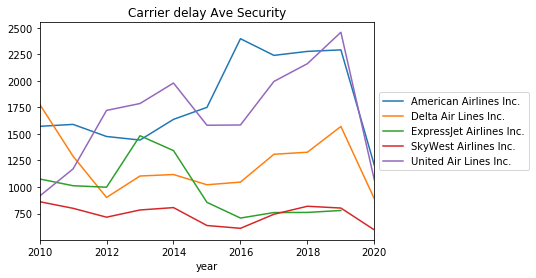

In [88]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['nas_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='nas_delay', ax=ax, label=carrier)

ax.set_title("Carrier delay NAS Security")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

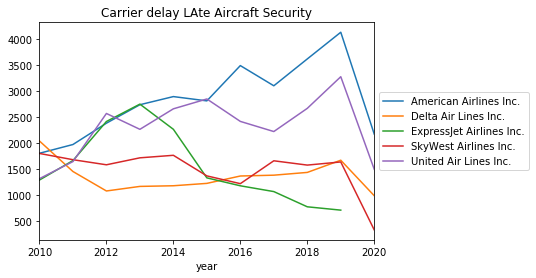

In [89]:
# making a loop for mean per Year
fig, ax = plt.subplots()
sums = df_sub.groupby(['carrier_name', 'year'])['late_aircraft_delay'].mean().reset_index(level=0)

# Use ax for both
for carrier in sums['carrier_name'].unique():
    sums[sums['carrier_name'] == carrier].plot(y='late_aircraft_delay', ax=ax, label=carrier)

ax.set_title("Carrier delay LAte Aircraft Security")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

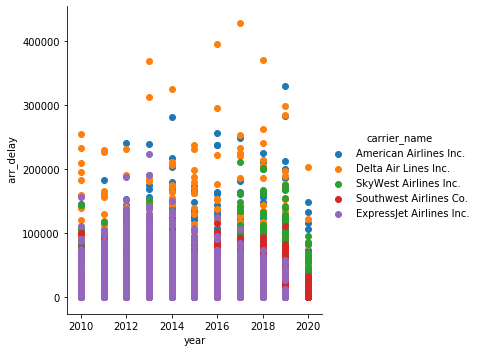

In [24]:
df_arrival_delay = df_arrival_delay.loc[df_arrival_delay['carrier_name'].isin(['Southwest Airlines Co.','American Airlines Inc.','SkyWest Airlines Inc.','Delta Air Lines Inc.','ExpressJet Airlines Inc.'])]


# plotting
g = sb.FacetGrid(data = df_arrival_delay, hue = 'carrier_name', height = 5)
g.map(plt.scatter, 'year', ' arr_delay')
#g.set(xscale = 'log') # need to set scaling before customizing ticks
#x_ticks = 'year'
#g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

In [87]:
df_sub.groupby(['carrier_name']).mean().sort_values(by=['security_delay'], ascending=False)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
carrier_name,,,,,,,,,,,,,,,,,,
American Airlines Inc.,2015.049934,6.489522,677.228569,131.054480,40.475355,5.001022,43.462654,0.240001,41.863066,12.476964,1.932024,7967.848565,2676.920412,426.615087,1886.145676,11.978474,2966.188916,NaN
SkyWest Airlines Inc.,2015.298117,6.488586,301.045366,53.947943,13.006551,1.622609,16.070171,0.079299,23.159607,5.985227,0.869858,3614.677213,1124.808037,189.900268,749.735579,3.927542,1546.305787,NaN
Delta Air Lines Inc.,2014.974846,6.506304,517.306093,74.626349,23.841014,2.955572,26.847120,0.044806,20.928794,4.544185,0.994084,4607.136122,1718.045679,298.283284,1219.114960,3.138623,1368.553577,NaN
United Air Lines Inc.,2015.120534,6.471619,501.366774,94.931344,26.867847,3.001019,34.989185,0.045012,30.000592,6.667544,1.229014,6175.927074,1679.897046,276.877547,1780.824023,2.481817,2435.846641,NaN
ExpressJet Airlines Inc.,2014.269100,6.471631,291.648339,61.613635,17.105970,1.122093,18.861036,0.039619,24.433417,8.645506,0.876642,4149.597412,1354.018800,114.194824,1002.271697,1.689609,1677.422483,NaN


In [8]:
#there are to many carrier, let's choose the one, who has the most delay
df_arrival_delay.sort_values(by=[' arr_delay'], ascending=False)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
23741,2017,4,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20424.0,3370.0,1027.45,112.19,...,1321.37,1197.0,101.0,429194.0,151581.0,23334.0,107073.0,39.0,147167.0,NaN
145764,2016,8,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21977.0,3307.0,1242.16,89.11,...,1168.04,598.0,23.0,395609.0,196944.0,8108.0,61036.0,321.0,129200.0,NaN
118664,2018,6,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21029.0,4176.0,1026.09,188.33,...,1443.45,62.0,143.0,370937.0,108068.0,19018.0,112018.0,167.0,131666.0,NaN
102474,2013,7,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18649.0,5268.0,1117.20,164.62,...,1582.39,85.0,113.0,369537.0,106746.0,14418.0,137443.0,44.0,110886.0,NaN
35128,2019,5,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13392.0,3714.0,802.22,175.56,...,1416.42,716.0,75.0,329847.0,83637.0,23749.0,97283.0,92.0,125086.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94757,2011,4,F9,Frontier Airlines Inc.,PIE,"St. Petersburg, FL: St Pete Clearwater Interna...",9.0,1.0,0.33,0.00,...,0.27,0.0,0.0,15.0,5.0,0.0,6.0,0.0,4.0,NaN
80450,2019,7,YV,Mesa Airlines Inc.,RSW,"Fort Myers, FL: Southwest Florida International",4.0,1.0,0.00,0.00,...,0.00,0.0,0.0,15.0,0.0,0.0,15.0,0.0,0.0,NaN
84759,2019,10,9E,Endeavor Air Inc.,CMH,"Columbus, OH: John Glenn Columbus International",53.0,1.0,1.00,0.00,...,0.00,0.0,0.0,15.0,15.0,0.0,0.0,0.0,0.0,NaN
108565,2015,10,DL,Delta Air Lines Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",32.0,1.0,0.00,0.00,...,0.00,0.0,0.0,15.0,0.0,0.0,15.0,0.0,0.0,NaN


In [9]:
df_arrival_delay.groupby(['carrier_name']).sum().sort_values(by=[' arr_delay'], ascending=False)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
carrier_name,,,,,,,,,,,,,,,,,,
Southwest Airlines Co.,19911660,64195,12393211.0,2355904.0,714926.29,53315.29,435204.16,6642.21,1145816.28,175205.0,25187.0,117088490.0,34404462.0,4250889.0,17434745.0,254158.0,60744236.0,0.0
American Airlines Inc.,21172023,68182,7172596.0,1387998.0,428714.96,52970.82,460356.43,2542.09,443413.59,132130.0,20464.0,84395452.0,28353941.0,4518707.0,19978055.0,126876.0,31417873.0,0.0
SkyWest Airlines Inc.,43081095,138535,6617475.0,1186585.0,286131.11,35695.78,353527.70,1744.49,509488.20,131577.0,19121.0,79519284.0,24744652.0,4177616.0,16493433.0,86402.0,34017181.0,0.0
Delta Air Lines Inc.,32267706,104098,8476226.0,1223499.0,390921.10,48462.51,440212.22,734.69,343169.44,74344.0,16284.0,75543211.0,28170795.0,4890951.0,19989828.0,51464.0,22440173.0,0.0
ExpressJet Airlines Inc.,30284011,97158,4527065.0,956182.0,265689.93,17428.35,292949.61,615.37,379499.83,134199.0,13600.0,64451547.0,21030620.0,1773674.0,15567284.0,26243.0,26053726.0,0.0
United Air Lines Inc.,20157139,64812,5140621.0,973426.0,275583.51,30781.45,358884.07,461.69,307716.07,68354.0,12597.0,63346484.0,17230704.0,2839933.0,18265912.0,25456.0,24984479.0,0.0
JetBlue Airways,14077304,45471,2612632.0,611183.0,194359.34,10323.01,195722.29,1758.99,209019.83,47889.0,6834.0,40542852.0,12823766.0,1092475.0,10430032.0,81765.0,16114814.0,0.0
American Eagle Airlines Inc.,12718308,41038,1790579.0,358152.0,90979.27,23130.51,114319.32,146.44,129576.87,59933.0,4412.0,21130681.0,6118648.0,1934979.0,5385191.0,8042.0,7683821.0,0.0
US Airways Inc.,9351403,29753,2145985.0,353681.0,103990.75,7034.54,158377.76,1565.56,82712.90,28039.0,3546.0,17003363.0,5576780.0,574089.0,6047979.0,60468.0,4744047.0,0.0


In [11]:
grouped_d_arr = df_arrival_delay.groupby(['carrier_name']).sum().sort_values(by=[' arr_delay'], ascending=False)

In [20]:
grouped_d_arr.head(5)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
carrier_name,,,,,,,,,,,,,,,,,,
Southwest Airlines Co.,19911660,64195,12393211.0,2355904.0,714926.29,53315.29,435204.16,6642.21,1145816.28,175205.0,25187.0,117088490.0,34404462.0,4250889.0,17434745.0,254158.0,60744236.0,0.0
American Airlines Inc.,21172023,68182,7172596.0,1387998.0,428714.96,52970.82,460356.43,2542.09,443413.59,132130.0,20464.0,84395452.0,28353941.0,4518707.0,19978055.0,126876.0,31417873.0,0.0
SkyWest Airlines Inc.,43081095,138535,6617475.0,1186585.0,286131.11,35695.78,353527.70,1744.49,509488.20,131577.0,19121.0,79519284.0,24744652.0,4177616.0,16493433.0,86402.0,34017181.0,0.0
Delta Air Lines Inc.,32267706,104098,8476226.0,1223499.0,390921.10,48462.51,440212.22,734.69,343169.44,74344.0,16284.0,75543211.0,28170795.0,4890951.0,19989828.0,51464.0,22440173.0,0.0
ExpressJet Airlines Inc.,30284011,97158,4527065.0,956182.0,265689.93,17428.35,292949.61,615.37,379499.83,134199.0,13600.0,64451547.0,21030620.0,1773674.0,15567284.0,26243.0,26053726.0,0.0


In [90]:
#What is the trend of each type of delay from month to month? Which type of delay contributes the most to flight delays? Is there a lot of variation in any of these?

In [95]:
df_sub.rename(columns={" carrier_delay": "carrier_delay"})

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
124,2010,4,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",287.0,47.0,23.70,3.38,...,14.80,2.0,0.0,1962.0,779.0,212.0,173.0,0.0,798.0,NaN
125,2010,4,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",428.0,81.0,33.91,0.97,...,15.38,2.0,3.0,4012.0,1849.0,77.0,1180.0,27.0,879.0,NaN
126,2010,4,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",649.0,76.0,36.54,5.89,...,23.02,1.0,0.0,3883.0,1827.0,340.0,392.0,0.0,1324.0,NaN
127,2010,4,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",146.0,29.0,17.29,0.38,...,5.24,0.0,2.0,1593.0,1070.0,15.0,139.0,0.0,369.0,NaN
128,2010,4,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",90.0,11.0,5.43,0.16,...,3.58,0.0,0.0,397.0,131.0,16.0,78.0,0.0,172.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157803,2019,1,EV,ExpressJet Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",36.0,15.0,4.21,0.00,...,8.95,3.0,1.0,1632.0,442.0,0.0,111.0,0.0,1079.0,NaN
157804,2019,1,EV,ExpressJet Airlines Inc.,TUL,"Tulsa, OK: Tulsa International",189.0,34.0,7.80,2.42,...,14.21,10.0,0.0,2673.0,646.0,233.0,606.0,0.0,1188.0,NaN
157805,2019,1,EV,ExpressJet Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",240.0,72.0,22.87,2.98,...,22.00,15.0,0.0,6224.0,2439.0,429.0,1247.0,0.0,2109.0,NaN
157806,2019,1,EV,ExpressJet Airlines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",62.0,9.0,3.09,0.00,...,2.11,3.0,1.0,331.0,125.0,0.0,115.0,0.0,91.0,NaN


In [97]:
#Creating dataframes that will group each delay by month and calculate average delay for each
#carrier_by_month=df_sub.query('carrier_delay>0').groupby('year')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_month=df_sub.query('weather_delay>0').groupby('year')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_month=df_sub.query('nas_delay>0').groupby('year')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_month=df_sub.query('security_delay>0').groupby('year')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_month=df_sub.query('late_aircraft_delay>0').groupby('year')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [98]:
temp=weather_by_month.merge(nas_by_month,on='year')
temp=temp.merge(security_by_month,on='year')
#temp=temp.merge(security_by_month,on='month')
delays_by_month=temp.merge(lateaircraft_by_month,on='year')

No handles with labels found to put in legend.


NameError: name 'chart_labels' is not defined

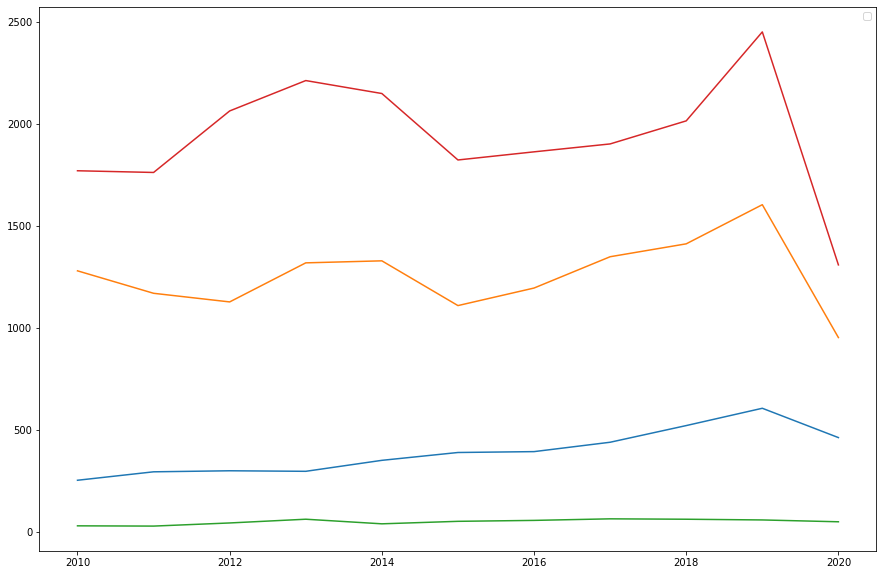

In [100]:
#Define line plot

plt.figure(figsize=(15,10))
#plt.errorbar(x=delays_by_month.month,y=delays_by_month.carrier_delay)
plt.errorbar(x=delays_by_month.year,y=delays_by_month.weather_delay)
plt.errorbar(x=delays_by_month.year,y=delays_by_month.nas_delay)
plt.errorbar(x=delays_by_month.year,y=delays_by_month.security_delay)
plt.errorbar(x=delays_by_month.year,y=delays_by_month.late_aircraft_delay)
plt.legend(loc='upper right')

chart_labels('Month','Average Delay in Minutes','Monthly Average Delays by Type')
plt.xticks(delays_by_month.month);